In [1]:
# bibliografia https://github.com/ngctnnnn/Simulation_experiments_for_optimizing_objective_function/blob/main/algorithm.py

In [2]:
!pip install celluloid

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install matplotlib pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera
#from matplotlib.animation import Camera
from matplotlib import  rc
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
!pip install ffmpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=8c71588531834ec7797d4b95a96454367e925e1685aea1c19d43a9259b70cc71
  Stored in directory: /root/.cache/pip/wheels/1d/57/24/4eff6a03a9ea0e647568e8a5a0546cdf957e3cf005372c0245
Successfully built ffmpeg


In [5]:


def DE(test_function, dimension, bounds, F_scale, cross_prob, popsize, max_evals):
    """
    Differential Evolution algorithm
    Args:
    test_function -- function to conduct
    bound_lower -- lower bound of the test function
    bound_upper -- upper bound of the test function
    F_scale -- scale factor on mutation
    cross_prob -- the probability of 2 individuals to do crossover
    popsize -- the population size
    max_evals -- the maximum fitness evaluation for the algorithm
    seed_number -- value of seed we want to run
    Returns:
    results -- best results after finishing the algorithm
    all_pops -- all the population 
    """
    eps = 0.00001

    bound_lower, bound_upper = np.asarray(bounds).T

    diff = np.fabs(bound_lower - bound_upper)

    pop = bound_lower + diff * np.random.rand(popsize, dimension)

    fitness = np.asarray([test_function(ind) for ind in pop])
    num_eval = 1
    
    best_idx = np.argmin(fitness)
    best = pop[best_idx]

    results = []
    all_pops = []
    results.append((np.copy(best), fitness[best_idx], num_eval))
    all_pops.append(np.copy(pop))
    generation_count = 0
    
    while True:
        # max_evals = 10000 if popsize >= 512 else 5000
        if num_eval > max_evals:
            break
        for i in range(popsize):
            # Mutation step
            idxes = [idx for idx in range(popsize) if idx != i]
            a, b, c = pop[np.random.choice(idxes, 3, replace=False)]
            mutant = np.clip(F_scale*(b - c) + a, bound_lower, bound_upper)

            # Create cross point
            cross_points = np.random.rand(dimension) < cross_prob
            if not np.any(cross_points):
                cross_points[np.random.randint(0, dimension)] = True
            
            # Offspring
            trial = np.where(cross_points, mutant, pop[i])

            # Evaluate fitness
            f = test_function(trial)
            num_eval += 1

            if f < fitness[i]:
                pop[i] = trial
                fitness[i] = f 
                if f < fitness[best_idx]:
                    best = trial
                    best_idx = i

        results.append((np.copy(best), fitness[best_idx], num_eval))
        all_pops.append(np.copy(pop))

        if test_function(best) < eps:
            num_eval += 1
            break

        generation_count += 1

    return results, all_pops, generation_count

In [6]:
seed_number = 19520925

bound_lower, bound_upper = -3, 3
popsize = 32
dimension = 2
max_evals = 1e5

# DE constants
F_scale=0.8
cross_prob=0.7

# ES constants
sigma_init=1.0
c_inc = 1.1
c_dec = 0.6

# CEM constants
num_elite = 10
sigma_init = 4

# CEMv2 constants
extra_std = 0.01

In [7]:
def Rosenbrock(ind):
    sum = 0
    for i in range(len(ind) - 1):
        sum += 100 * (ind[i + 1] - ind[i]**2)**2 + (ind[i] - 1)**2
    return sum 

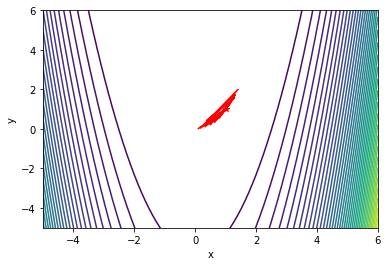

In [48]:
from matplotlib import animation

def DifferentialEvolution(test_function, dimension, bound_lower, bound_upper, F_scale, cross_prob, popsize, max_evals):
    np.random.rand(seed_number)
    
    results, all_pops, generation_count = DE(test_function, dimension, [(bound_lower, bound_upper)]*dimension, F_scale, cross_prob, popsize, max_evals)
    return results, all_pops, generation_count

results, all_pops, generation_count =  DifferentialEvolution(Rosenbrock, dimension, bound_lower, bound_upper, F_scale, cross_prob, popsize, max_evals)
bound_lower = -6
bound_upper = 6
x = np.linspace(bound_lower, bound_upper, 100)
y = np.linspace(bound_lower, bound_upper, 100)
X, Y = np.meshgrid(x, y)
Z = Rosenbrock([X, Y])

fig, ax = plt.subplots()

ax.set_xlim(( -5, 6))
ax.set_ylim((-5, 6))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.contour(X,Y,Z, levels = 50)
ax.plot(1,1,"r*")
plot, = ax.plot([], [], color='red')


def init():
    plot.set_data([],[])
    return (plot,)

def animate(i):
    plot.set_data(all_pops[i][:, 0], all_pops[i][:, 1])
    return (plot,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=50,
                               interval=50, blit=True)


    #save the animation as a gif file

HTML(anim.to_html5_video())